# Анализ изображений и видео (CSC)
## Домашнее задание №1
### Санникова Елена Сергеевна

### 1. Теоретические задания:

(a) Такая особенность зрительного восприятия человека называется адаптацией зрения. При переходе из светлого помещения в темную комнату происходит темновая адаптация, при которой начинают работать палочки и чувствительность глаза увеличивается в несколько раз. При этом глаз обретает способность различить изменения яркости довольно слабых источников света.

(b) Коэффициенты $a_{ij}$ образуют матрицу перехода $A$ из одного пространства в другое. Для перехода между пространствами достаточно существования обратной матрицы: $A^{-1}$, для существования которой определитель матрицы $A$ должен быть не нулевым: $det(A) \neq 0$

(b*) Область определения значений $RGB$ - куб в 3-х мерном пространстве, вершины которого $(0,0,0), (0,0,1), ... , (1,1,1)$. При линейном преобразовании одного пространства в другое мы можем наблюдать только поворот и растяжение нашего куба. Чтобы область определения $R_{new}G_{new}B_{new}$ так же лежала в пределах от 0 до 1, необходимо, чтобы для каждой вершины $(R, G, B)$ выполнялись следующие условия:
$$0 < a_{11} \cdot R + a_{12} \cdot G + a_{13} \cdot B + a_{14} < 1$$
$$0 < a_{21} \cdot R + a_{22} \cdot G + a_{23} \cdot B + a_{24} < 1$$
$$0 < a_{31} \cdot R + a_{32} \cdot G + a_{33} \cdot B + a_{34} < 1$$

(c) Графики функций $y_1 = x$ и $y_2 = \sin(x)$ на отрезке $[0,1]$ почти не отличаются: $y_1 \leq y_2$ и и их разница заметно увеличивается только ближе к 1. Т.о., применив $sin$ к цветовым каналам самые яркие значения цветов немного уменьшатся и картинка станет тускнее.

### 2. Практические задания:

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [2]:
def imshow(img):
    plt.axis("off")
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

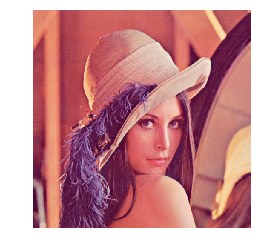

In [3]:
lena_img = cv2.imread('lena.jpg')
height = lena_img.shape[0]
weight = lena_img.shape[1]
imshow(lena_img)

(a)

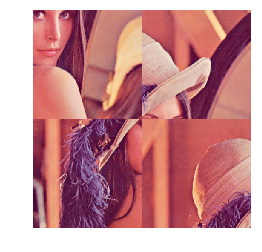

In [4]:
lena_tmp = lena_img[:height//2, :weight//2]
lena_mix = np.copy(lena_img)
lena_mix[:height//2, :weight//2] = lena_mix[height//2:, weight//2:]
lena_mix[height//2:, weight//2:] = lena_tmp
imshow(lena_mix)

(b)

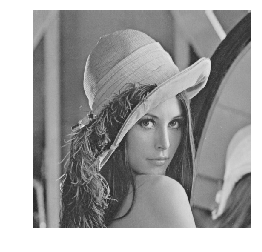

In [5]:
lena_mean = np.zeros((lena_img.shape)).astype(np.uint8)
for i in range(height):
    for j in range(weight):
        lena_mean[i][j] = int(np.sum(lena_img[i][j])//3)
imshow(lena_mean)

(c)

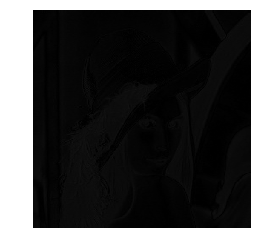

In [6]:
lena_mean_cvt = cv2.cvtColor(lena_img, cv2.COLOR_BGR2GRAY)
lena_mean_cvt_3 = np.zeros(lena_mean.shape)
for i in range(height):
    for j in range(weight):
        lena_mean_cvt_3[i][j] = lena_mean_cvt[i][j]
lena_diff = np.abs(lena_mean-lena_mean_cvt_3).astype(np.uint8)
imshow(lena_diff)

(d)

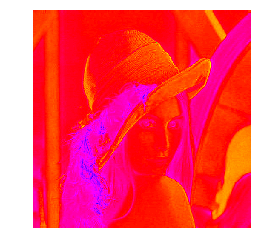

In [7]:
lena_img = cv2.imread('lena.jpg')
lena_hsv = cv2.cvtColor(lena_img, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(lena_hsv)
s = np.full(s.shape, np.uint8(255))
v = np.full(v.shape, np.uint8(255))
lena_max_sv = cv2.merge((h, s, v)) 
lena_max_sv_rgb = cv2.cvtColor(lena_max_sv, cv2.COLOR_HSV2BGR)
imshow(lena_max_sv_rgb)

(e)

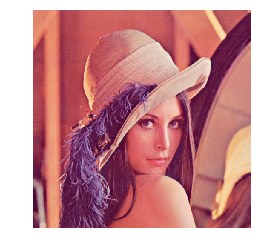

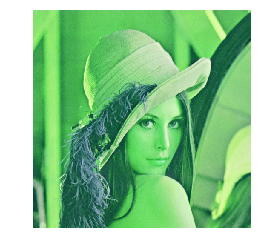

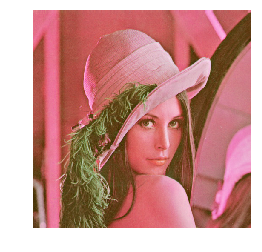

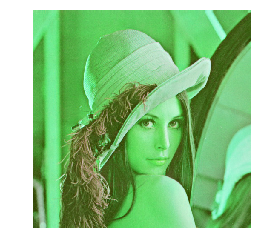

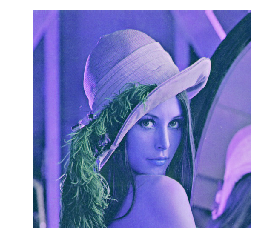

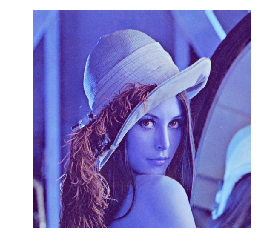

In [8]:
from itertools import permutations
lena_img = cv2.imread('lena.jpg')
b, g, r = cv2.split(lena_img)
i = 0
for a in permutations([b,g,r], 3):
    img = cv2.merge(a)
    img_name = 'Lena{}.jpg'.format(i)
    i += 1
    imshow(img)
    cv2.imwrite(img_name, img)



(f)

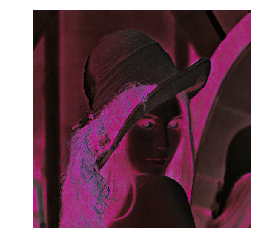

In [9]:
lena_img = cv2.imread('lena.jpg')
lena_hsv = cv2.cvtColor(lena_img, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(lena_hsv)
v = - v - 1
lena_max_sv = cv2.merge((h, s, v)) 
lena_max_sv_rgb = cv2.cvtColor(lena_max_sv, cv2.COLOR_HSV2BGR)
imshow(lena_max_sv_rgb)

(g)

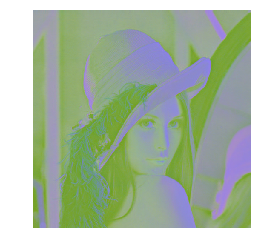

In [10]:
lena_img = cv2.imread('lena.jpg')
lena_CIE_lab = cv2.cvtColor(lena_img, cv2.COLOR_BGR2Lab)
imshow(lena_CIE_lab)

In [11]:
def func(color):
    if color > 0.04045:
        return ((color + 0.055) / 1.055) ** 2.4 
    else:
        return color / 12.92
        
def BGR2XYZ(B, G, R):
    b, g, r = func(B/255) * 100, func(G/255) * 100, func(R/255) * 100
    X = r * 0.4124 + g * 0.3576 + b * 0.1805
    Y = r * 0.2126 + g * 0.7152 + b * 0.0722
    Z = r * 0.0193 + g * 0.1192 + b * 0.9505
    return X, Y, Z

In [12]:
def func2(color):
    if color > 0.008856:
        return color**(1/3)
    else: 
        return 7.787 * color + 16 / 116
        
def XYZ2Lab(X, Y, Z):
    ref_X, ref_Y, ref_Z =  95.047, 100.0, 108.883
    x, y, z = func2(X/ref_X), func2(Y/ref_Y), func2(Z/ref_Z)
    L = (116 * y) - 16
    a = 500 * (x - y)
    b = 200 * (y - z)
    return L, a, b
    

In [13]:
def BGR2Lab(img):
    res_img = np.zeros(img.shape)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            X, Y, Z = BGR2XYZ(*img[i][j])
            L, a, b = XYZ2Lab(X, Y, Z)
            res_img[i][j] = [L, a, b]
    return res_img.astype(np.uint8)
    

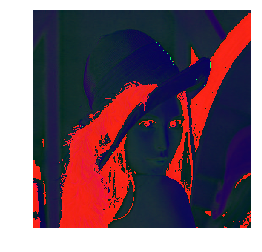

In [14]:
my_lena_CIE_lab = BGR2Lab(lena_img)
imshow(my_lena_CIE_lab)

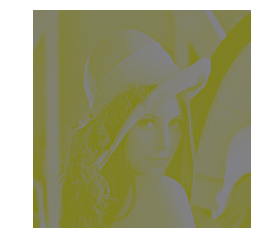

In [15]:
lena_CIE_lab_diff = my_lena_CIE_lab - lena_CIE_lab
imshow(np.abs(lena_CIE_lab - my_lena_CIE_lab))